In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mentalillness.csv to Mentalillness.csv


In [3]:
data = pd.read_csv('Mentalillness.csv')

In [4]:
data.head()

,ID,Inflated self-esteem,Distractibility,Increase in goal-directed activity,Excessive involvement in activities with high potential for painful consequences,Racing thoughts,Decreased need for sleep,More talkative than usual,Disorganized thinking or speech,Intrusive memories or flashbacks,...,Sleep disturbance.1,More than one month of disturbance,The disturbance causes clinically significant distress,The disturbance is not substance induced,Intrusive memories or flashback,Bipolar disorder,Schizophrenia,Depression,Anxiety disorder,PTSD
0,1,0,1,1,0,1,1,0,0,1,...,1,0,0,0,0,1,1,1,1,0
1,2,0,1,0,0,1,1,1,0,0,...,1,1,0,0,1,1,1,0,0,0
2,3,1,0,1,0,0,0,0,1,0,...,1,1,1,1,1,0,1,1,0,1
3,4,0,0,1,0,0,1,1,0,1,...,0,0,1,1,1,1,0,0,0,0
4,5,1,1,0,0,1,1,1,0,0,...,0,1,0,1,0,1,1,0,1,0


In [5]:
total_nans = data.isna().sum().sum()
print(total_nans)  # całkowita liczba NaN w całym DataFrame

0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 59 columns):
 #   Column                                                                                 Non-Null Count  Dtype
---  ------                                                                                 --------------  -----
 0   ID                                                                                     3753 non-null   int64
 1   Inflated self-esteem                                                                   3753 non-null   int64
 2   Distractibility                                                                        3753 non-null   int64
 3   Increase in goal-directed activity                                                     3753 non-null   int64
 4   Excessive involvement in activities with high potential for painful consequences       3753 non-null   int64
 5   Racing thoughts                                                                        375

In [7]:
data.count()

,0
ID,3753
Inflated self-esteem,3753
Distractibility,3753
Increase in goal-directed activity,3753
Excessive involvement in activities with high potential for painful consequences,3753
Racing thoughts,3753
Decreased need for sleep,3753
More talkative than usual,3753
Disorganized thinking or speech,3753
Intrusive memories or flashbacks,3753


In [8]:
col1 = data['Sleep disturbance']
col2 = data['Sleep disturbance.1']

print((col1 == col2).all())

False


In [9]:
diff_rows = data[col1 != col2]
print(diff_rows[['Sleep disturbance', 'Sleep disturbance.1']])

      Sleep disturbance  Sleep disturbance.1
1                     0                    1
2                     0                    1
3                     1                    0
4                     1                    0
6                     1                    0
...                 ...                  ...
3740                  1                    0
3742                  0                    1
3746                  0                    1
3748                  0                    1
3750                  0                    1

[1855 rows x 2 columns]


In [10]:
data.insert(
    loc = data.columns.get_loc('Sleep disturbance'),
    column = 'Sleep_disturbance_combined',
    value = data[['Sleep disturbance', 'Sleep disturbance.1']].max(axis=1)
    )

In [11]:
data = data.drop(columns=['Sleep disturbance', 'Sleep disturbance.1'])

In [12]:
col1 = data['Intrusive memories or flashbacks']
col2 = data['Intrusive memories or flashback']

print((col1 == col2).all())

False


In [13]:
diff_rows = data[col1 != col2]
print(diff_rows[['Intrusive memories or flashbacks', 'Intrusive memories or flashback']])

      Intrusive memories or flashbacks  Intrusive memories or flashback
0                                    1                                0
1                                    0                                1
2                                    0                                1
5                                    1                                0
10                                   1                                0
...                                ...                              ...
3737                                 0                                1
3744                                 1                                0
3747                                 0                                1
3748                                 0                                1
3750                                 0                                1

[1894 rows x 2 columns]


In [14]:
data.insert(
    loc = data.columns.get_loc('Intrusive memories or flashbacks'),
    column = 'Intrusive_memories_or_flashbacks_combined',
    value = data[['Intrusive memories or flashbacks', 'Intrusive memories or flashback']].max(axis=1)
    )

In [15]:
data = data.drop(columns=['Intrusive memories or flashbacks', 'Intrusive memories or flashback'])

In [16]:
data = data.drop(columns=['ID'])

In [17]:
features = data.iloc[:, :-5]
targets = data.iloc[:, -5:]

In [18]:
print(features.head())

   Inflated self-esteem  Distractibility  Increase in goal-directed activity  \
0                     0                1                                   1   
1                     0                1                                   0   
2                     1                0                                   1   
3                     0                0                                   1   
4                     1                1                                   0   

   Excessive involvement in activities with high potential for painful consequences  \
0                                                  0                                  
1                                                  0                                  
2                                                  0                                  
3                                                  0                                  
4                                                  0                                

In [19]:
print(targets.head())

   Bipolar disorder  Schizophrenia  Depression  Anxiety disorder  PTSD
0                 1              1           1                 1     0
1                 1              1           0                 0     0
2                 0              1           1                 0     1
3                 1              0           0                 0     0
4                 1              1           0                 1     0


In [20]:
ilnesses_counts = targets.sum()

In [21]:
print(ilnesses_counts)

Bipolar disorder    2909
Schizophrenia       3167
Depression          1845
Anxiety disorder    1622
PTSD                 203
dtype: int64


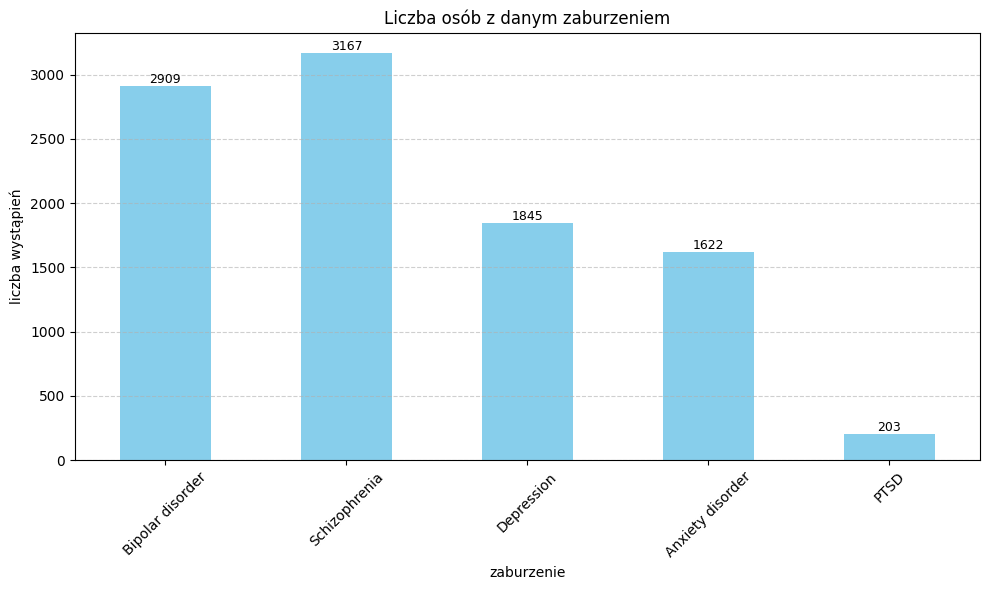

In [22]:
plt.figure(figsize=(10, 6))
ax = ilnesses_counts.plot(kind='bar', color='skyblue')

plt.title("Liczba osób z danym zaburzeniem")
plt.xlabel("zaburzenie")
plt.ylabel("liczba wystąpień")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='bottom', xytext=(0,0), color='black', fontsize=9, textcoords='offset points')

plt.savefig('liczba_zaburzenia.png', dpi=300, bbox_inches='tight')

plt.show()

In [23]:
targets_per_row = targets.sum(axis=1)

print(targets_per_row.head(10))

0    4
1    2
2    3
3    1
4    3
5    1
6    2
7    3
8    3
9    3
dtype: int64


In [24]:
target_distribution = targets_per_row.value_counts().sort_index()

print(target_distribution)

0      31
1     394
2    1269
3    1447
4     587
5      25
Name: count, dtype: int64


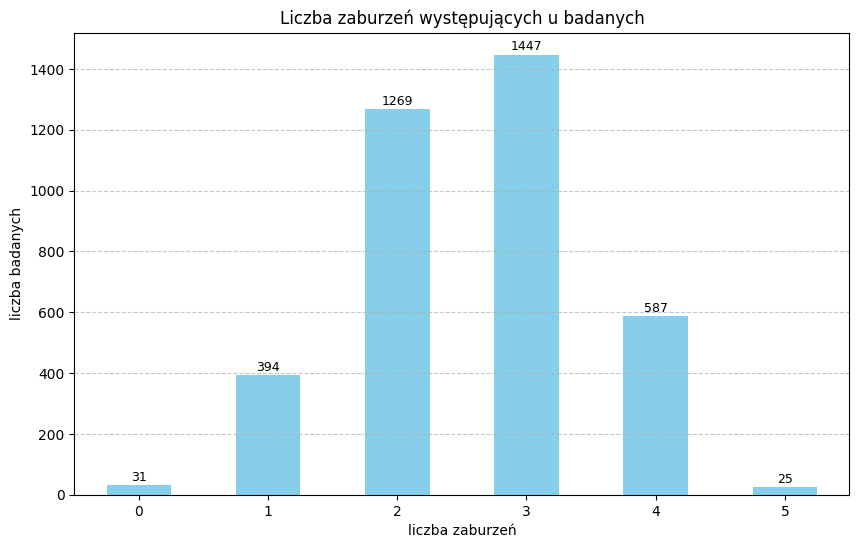

In [25]:
plt.figure(figsize=(10, 6))
ax = target_distribution.plot(kind='bar', color='skyblue')
plt.title('Liczba zaburzeń występujących u badanych')
plt.xlabel('liczba zaburzeń')
plt.ylabel('liczba badanych')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for a in ax.patches:
  ax.annotate(f'{a.get_height()}', (a.get_x() + a.get_width() / 2., a.get_height()),
              ha='center', va='bottom', xytext=(0,1), textcoords='offset points', color='black', fontsize=9)

plt.savefig('liczba_diagnoz.png', dpi=300, bbox_inches='tight')

plt.show()

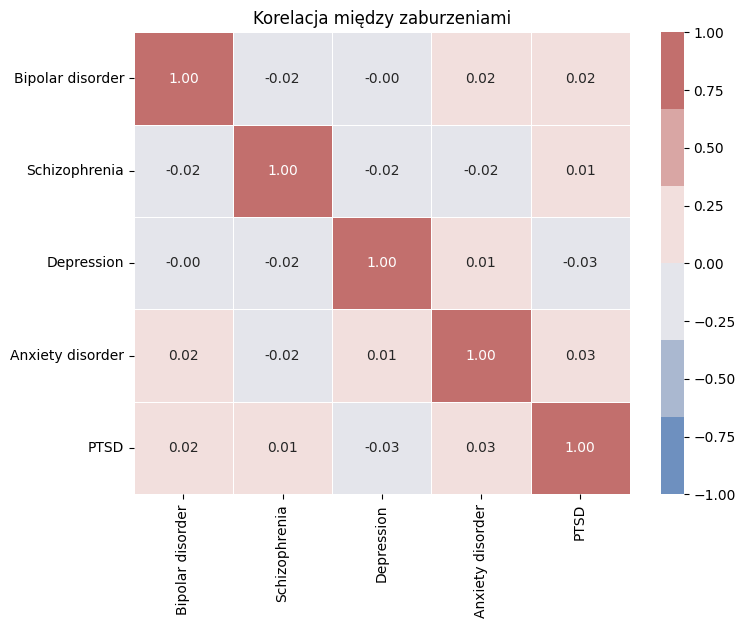

In [26]:
correlation_matrix = targets.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(palette='vlag'), fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelacja między zaburzeniami')

plt.savefig('korelacja_zaburzenia.png', dpi=300, bbox_inches='tight')

plt.show()

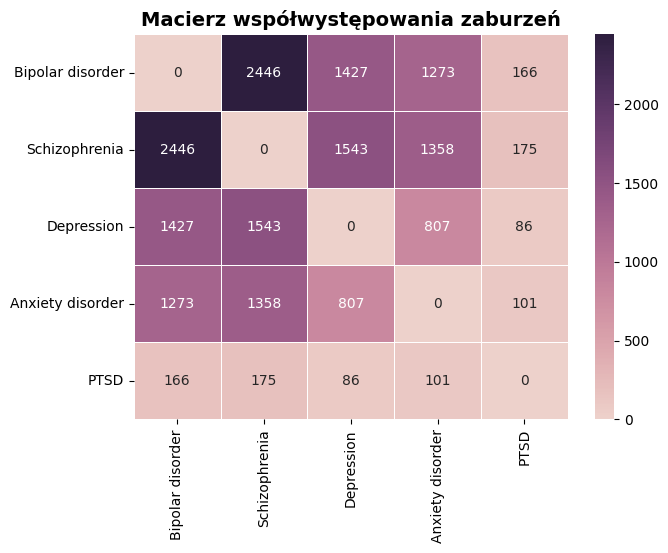

In [27]:
co_occurrence_matrix = targets.T.dot(targets)

# wartości diagonali = 0 (to nie współwystępowanie tylko występowanie)
for i in range(len(co_occurrence_matrix)):
    co_occurrence_matrix.iat[i, i] = 0

plt.figure(figsize=(7, 5))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5)
plt.title('Macierz współwystępowania zaburzeń', fontsize=14, fontweight='bold')

plt.savefig('wspolwyst_zaburzen.png', dpi=300, bbox_inches='tight')

plt.show()

In [28]:
print(targets.head())

   Bipolar disorder  Schizophrenia  Depression  Anxiety disorder  PTSD
0                 1              1           1                 1     0
1                 1              1           0                 0     0
2                 0              1           1                 0     1
3                 1              0           0                 0     0
4                 1              1           0                 1     0


In [29]:
def plot_sympton_correlation(disease_name, title):
  disease = targets[disease_name]

  correlation_with_disease = features.corrwith(disease)

  top_correlation_with_disease = correlation_with_disease[correlation_with_disease >= 0.04]

  top_correlation_with_disease_sorted = top_correlation_with_disease.sort_values()

  labels = top_correlation_with_disease_sorted.index

  labels = get_proper_labels(labels)

  plt.figure(figsize=(7, 6))
  top_correlation_with_disease_sorted.plot(kind='barh', color=sns.color_palette("Blues", len(top_correlation_with_disease_sorted)))

  for index, value in enumerate(top_correlation_with_disease_sorted):
      plt.text(value, index, f'{value:.2f}', ha='left', va='center')

  plt.yticks(range(len(labels)), labels)

  plt.title(title, fontsize=12, fontweight="bold")
  plt.xlabel('Objawy')
  plt.ylabel('Korelacja')

  plt.savefig(f'{disease_name}_skorelowane_objawy.png', dpi=300, bbox_inches='tight')

  plt.show()

In [30]:
def get_proper_labels(labels):
  labels = [label if label != 'Persistent and exaggerated negative belief about oneself or the world' else 'Persistent and exaggerated negative belief\nabout oneself or the world' for label in labels]
  labels = [label if label != 'Difficulty concentrating or making decisions' else 'Difficulty concentrating\nor making decisions' for label in labels]
  labels = [label if label != 'Excessive involvement in activities with high potential for painful consequences' else 'Excessive involvement in activities with\nhigh potential for painful consequences' for label in labels]
  return labels

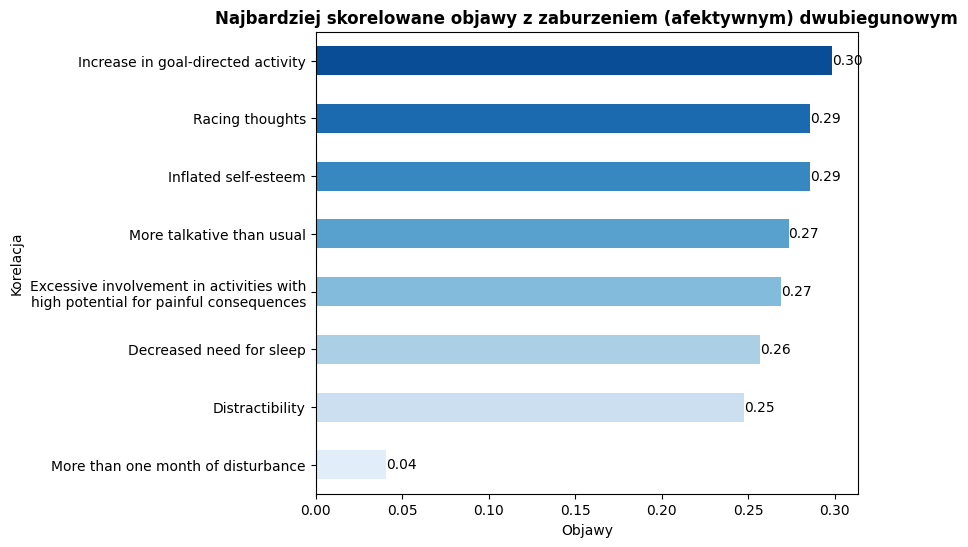

In [31]:
plot_sympton_correlation('Bipolar disorder', 'Najbardziej skorelowane objawy z zaburzeniem (afektywnym) dwubiegunowym')

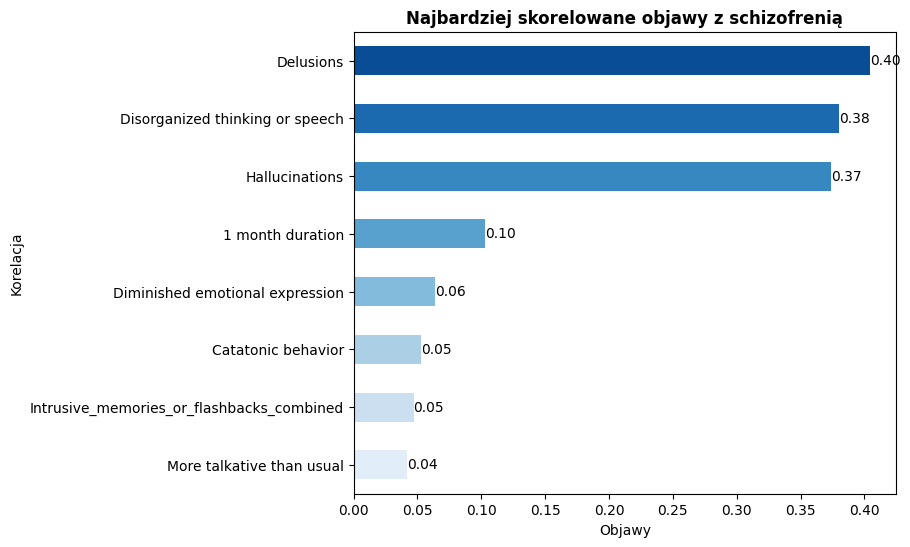

In [32]:
plot_sympton_correlation('Schizophrenia', 'Najbardziej skorelowane objawy z schizofrenią')

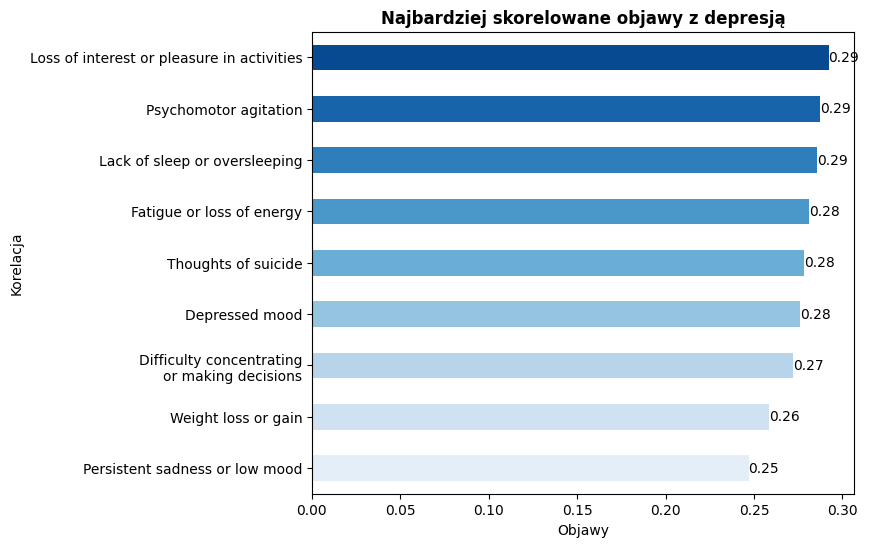

In [33]:
plot_sympton_correlation('Depression', 'Najbardziej skorelowane objawy z depresją')

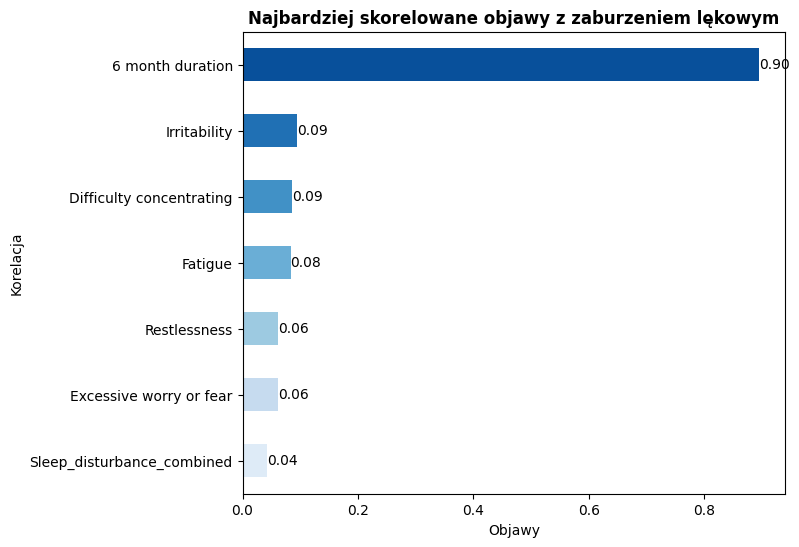

In [34]:
plot_sympton_correlation('Anxiety disorder', 'Najbardziej skorelowane objawy z zaburzeniem lękowym')

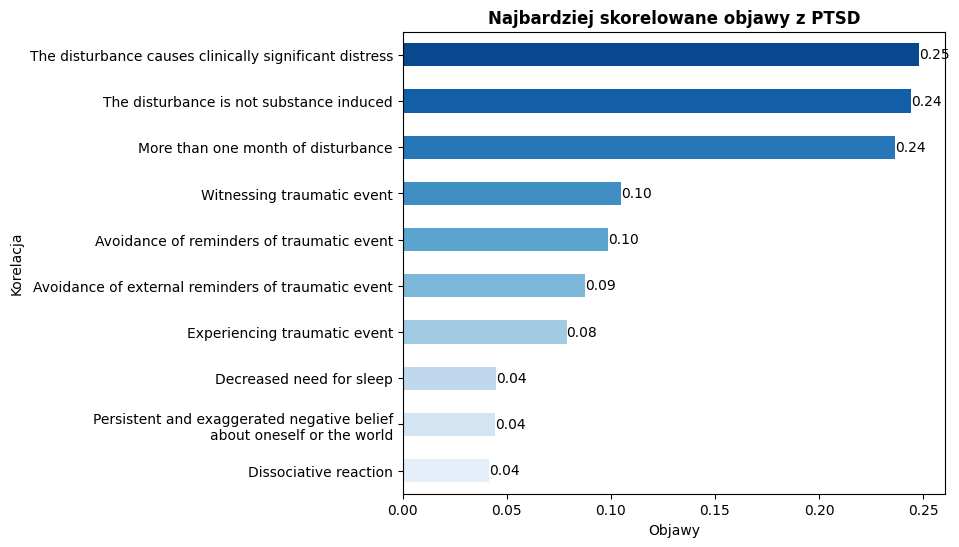

In [35]:
plot_sympton_correlation('PTSD', 'Najbardziej skorelowane objawy z PTSD')

In [36]:
# features to Twój DataFrame
column_names = features.columns.tolist()

# wyświetlenie
print(column_names)


['Inflated self-esteem', 'Distractibility', 'Increase in goal-directed activity', 'Excessive involvement in activities with high potential for painful consequences', 'Racing thoughts', 'Decreased need for sleep', 'More talkative than usual', 'Disorganized thinking or speech', 'Intrusive_memories_or_flashbacks_combined', 'Diminished emotional expression', 'Delusions', 'Hallucinations', 'Catatonic behavior', '1 month duration', 'Depressed mood', 'Persistent sadness or low mood', 'Loss of interest or pleasure in activities', 'Fatigue or loss of energy', 'Difficulty concentrating or making decisions', 'Lack of sleep or oversleeping', 'Psychomotor agitation', 'Thoughts of suicide', 'Weight loss or gain', 'Excessive worry or fear', 'Fatigue', 'Sleep_disturbance_combined', 'Difficulty concentrating', 'Restlessness', 'Irritability', '6 month duration', 'Experiencing traumatic event', 'Witnessing traumatic event', 'Dissociative reaction', 'Recurrent distressing dreaming affiliated with the trau

In [37]:
questions = [
  "Do you feel an usually high sense of self-esteem (inflated self-esteem)?",
  "Do you get easly distracted?",
  "Have you been engaging in more goal-directed activity than usual?",
  "Do you often involve in activities with high potential for painful consequences?",
  "Do you experience racing thoughts?",
  "Do you have a decreased need for sleep?",
  "Are you more talkative than usual?",
  "Do you find it hard to organize your thoughts or speak clearly (disorganized thinking or speech)?",
  "Do you experience intrusive memories or flashbacks?",
  "Do you show less emotion than usual (diminished emotional expression)?",
  "Do you experience delusions (holding on beliefs that others find unrealistic or false)?",
  "Do you experience hallucinations (seeing or hearing things that others do not)?",
  "Do you experience peroids of unusual or rigid behavior (catatonic behavior)?",
  "Have you experienced disturbance for at least 1 month?",
  "Do you experience depressed mood?",
  "Do you experience persistent sadness or low mood?",
  "Have you lost interest or pleasure in activities?",
  "Do you feel unusually tired (fatigue) or low on energy?",
  "Do you have trouble concentrating or making decisions?",
  "Do you have problems with too little or too much sleep (lack of sleep or oversleeping?",
  "Do you experience such restlessness or inner tension that makes you hard to stay still (psychomotor agitation)?",
  "Do you have thoughts of suicide?",
  "Have you experienced changes in your weight?",
  "Do you feel excessive worry or fear?",
  "Do you feel fatigued?",
  "Do you experience problems with your sleep? (sleep disturbance)",
  "Is it difficult for you to concentrate?",
  "Do you feel restless?",
  "Do you get irritated easly?",
  "Have you experienced disturbance for at least 6 months?",
  "Have you experienced a traumatic event?",
  "Have you witnessed a traumatic event?",
  "Do you experience moments of feeling disconnected from yourself triggered by someting (dissociative reaction experience)?",
  "Do you have recurring distressing dreaming affiliated with the traumatic event?",
  "Do you feel intense distress or reaction when exposed to cues affiliated with the traumatic event?",
  "Do you try to avoid reminders of traumatic event?",
  "Do you avoid external reminders of traumatic event (for example places or people)?",
  "Do you have persistent and exaggerated negative belief about yourself or the world?",
  "Do you experience persistent loss of memory about the cause or consequences of the traumatic event?",
  "Do you experience persistent negative emotional state?",
  "Do you experience diminished interest?",
  "Do you experience feeling of detachment?",
  "Do you struggle with persistent inability to experience positive emotions?",
  "Do you have angry outbursts?",
  "Do you act in a reckless way?",
  "Do you feel constantly on guard or watchful (feeling of hypervigilance)?",
  "Do you startle very easly after being triggered by something (exaggerated startle response)?",
  "Do you struggle to concentrate?",
  "Have you experienced disturbance for longer than one month?",
  "Do disturbances you experience cause significant distress in your daily life (clinically significant disturbance)?",
  "Do you agree that disturbances you experience are not substance induced?"
]


In [38]:
for col, q in zip(column_names, questions):
  for col, q in zip(column_names, questions):
    print(f"\\item\\textbf{{{col}}} - {q}")

\item\textbf{Inflated self-esteem} - Do you feel an usually high sense of self-esteem (inflated self-esteem)?
\item\textbf{Distractibility} - Do you get easly distracted?
\item\textbf{Increase in goal-directed activity} - Have you been engaging in more goal-directed activity than usual?
\item\textbf{Excessive involvement in activities with high potential for painful consequences} - Do you often involve in activities with high potential for painful consequences?
\item\textbf{Racing thoughts} - Do you experience racing thoughts?
\item\textbf{Decreased need for sleep} - Do you have a decreased need for sleep?
\item\textbf{More talkative than usual} - Are you more talkative than usual?
\item\textbf{Disorganized thinking or speech} - Do you find it hard to organize your thoughts or speak clearly (disorganized thinking or speech)?
\item\textbf{Intrusive_memories_or_flashbacks_combined} - Do you experience intrusive memories or flashbacks?
\item\textbf{Diminished emotional expression} - Do yo